# Stochastic Dynamic Programming Problems in Pac-man's Grid World


Pac-man is an example of a pursuit-evasion game: the main player pac-man tries 
to evade a set of so-called ghosts, which are pursuing players.  A very simplified 
version of this game is considered here where the aim is to compute a policy 
for a single ghost to pursue pac-man in a grid world.

The stage for the game is depicted in Figure 1 where 77 possible positions/cells 
for pac-man and for the ghost are considered. Both ghost and pac-man can only 
move to an adjacent cell (left, right, up down, while diagonal moves are not 
allowed) at each time step/iteration $k \in \{1, 2, \ldots\}$ or stay in the 
same cell (e.g. if the current position is 65, then the next cell might be 65, 
66 or 61, if the current cell is 38 then the next cell might be 38, 48, 39, 
37, 31. The game ends when pac-man and ghost occupy the same cell or cross each 
other in a given move, i.e., at a given time $k$ the move of the ghost is such 
that the next cell is the current position of the pac-man, and vice-versa. Run 
the following instruction with the functions provided to see the behavior of 
pac-man and ghost with some random policies.

`playoptctrpacman([9 1]',[5 13]',2,1)`

The first and second arguments of this function are vectors with the (y,x) 
coordinates of pac-man and ghost, respectively. The third and fourth arguments 
define the policies which should be used for the players. See more details about 
this function below.

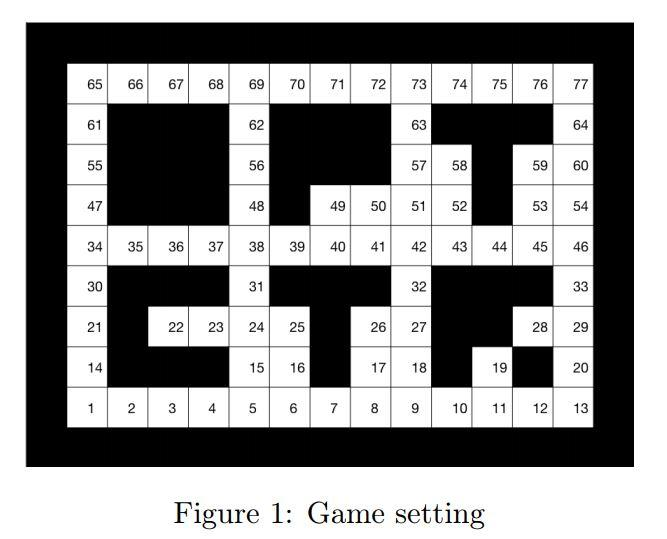


In this live script, we find the policy for the ghost using _stochastic dynamic 
programming_ assuming pac-man moves as follows. If it is possible to move to 
an adjacent cell to the right, it does so with probability 0.5 and otherwise 
moves randomly with equal probability of staying at the same cell and moving 
to any of the feasible adjacent cells; if the adjacent cell to the right is 
an obstacle/wall, it moves randomly with equal probability of staying in the 
same cell and moving to any of the feasible adjacent cells. Let $s_{ghost} \in 
\{1, \ldots , 77 \}$, $s_{pac} \in \{1, \ldots, 77\}$ denote the cell of the 
ghost and the cell of pac-man. Given this model, the goal is to provide the 
stochastic dynamic programming policy for the ghost that minimizes the following 
cost

$$\mathbb{E}\left[\sum_{k=0}^{h-1} g(x_k) + J_h(x_h)\right] $$

where $x_k = (s_{\mathrm{pac},k}, s_{\mathrm{gho},k})$ is the state comprising 
the positions of pac-man at a given time $k$. The cost is  

$$g\left(x_{k}\right)=\left\{\begin{array}{l}{0 \text { if } s_{\mathrm{pac}, 
k}=s_{\mathrm{gho}, k}} \\{1 \text { otherwise }}\end{array}\right.$$

and the terminal cost is

$$J_h\left(x_{h}\right)=\left\{\begin{array}{l}{0 \text { if } s_{\mathrm{pac}, 
k}=s_{\mathrm{gho}, k}} \\{\alpha \text { otherwise }}\end{array}\right.$$

where $\alpha = 10000$ is a constant penalizing heavily the pursuer if the 
game is not over after $h$ stages. For the horizon pick $h = 1000$ emulating 
an infinite horizon. This formulation approximates well the goal of minimizing 
the expected time length that takes to terminate the game by having the ghost 
intersect pac-man. This formulation also assumes that the game only ends when 
pack-man and ghost occupy the same cell, and not when they cross each other 
in a given move. This facilitates the problem formulation, although in practice 
the game will terminate if a crossing situation occurs. The state evolution 
is such that 

$$x_{k+1} = (s_{\mathrm{pac},k+1}, s_{\mathrm{gho},k+1}) = (s_{\mathrm{pac},k}, 
s_{\mathrm{gho},k}) = x_k \text{ if } s_{\mathrm{pac},k} = s_{\mathrm{gho},k}$$ 

and

$$x_{k+1} = (s_{\mathrm{pac},k+1}, s_{\mathrm{gho},k+1}) = (f_1(w_k), f_2(u_k))$$ 

otherwise, where $w_k$ is a disturbance signal that, together with $f_1$, 
models the stochastic behaviour of pac-man described above. Moreover, $u_k$ 
is a decision input (stay, move left, right, up, down, whenever feasible) that, 
together with $f_2$, models the possible decisions of the ghost. The expressions 
for $f_1$ and $f_2$ and the definitions of $w_k$ and $u_k$ are omitted here.  

Assume that the pac-man moves as follows. If it is possible to move to an 
adjacent cell at the right, it does so with probability 0.5 and otherwise moves 
randomly with equal probability of staying at the same cell and moving to any 
of the remaining feasible adjacent cells; if the adjacent cell at the right 
is an obstacle/wall, it moves randomly with equal probability of staying at 
the same cell and moving to any of the feasible adjacent cells. Furthermore, 
assume that the game only ends when pac-man and ghost occupy the same cell.

The Matlab function `stochdppol` provides the stochastic dynamic programming 
policy.

The inputs to the Matlab function are:

* sgho = $s_{ghost} \in \{1, 2, \ldots, 12, 13, 20, 29, 33, \ldots, 77, 76, 
\ldots, 65, 61, \ldots, 21, 14\}$ representing the cell of the ghost;
* spac = $s_{pac} \in \{1, \ldots, 77\}$ representing is the cell of the pac-man.

The output is nextstate = $s_{next}$ which is the next state determined by 
the stochastic dynamic programming policy. If this optimal decision is not unique, 
then the output should be the state cell with the smallest numerical label.     

The behaviour of the policy can be tested with, for instance, the following 
instruction

In [ ]:
from IPython.display import clear_output
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches

The MATLAB implementation is given next. The next function relies on the stochastic 
dynamic programming algorithm to compute a matrix that provides the next state 
for the ghost to move given the cell numbers of the ghost (row) and of pac-man 
(column).

In [ ]:
def stochdppolMatrix():
    # This function obtain a 77 by 77 such that P_(sgho,spac) is the next cell
    # that ghost should move to, given the current ghost cell sgho and current
    # pac-man cell spac

    # these set of instructions simply define convinient data structures

    States = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                       [14, np.inf, np.inf, np.inf, 15, 16, np.inf, 17, 18, np.inf, 19, np.inf, 20],
                       [21, np.inf, 22, 23, 24, 25, np.inf, 26, 27, np.inf, np.inf, 28, 29],
                       [30, np.inf, np.inf, np.inf, 31, np.inf, np.inf, np.inf, 32, np.inf, np.inf, np.inf, 33],
                       [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46],
                       [47, np.inf, np.inf, np.inf, 48, np.inf, 49, 50, 51, 52, np.inf, 53, 54],
                       [55, np.inf, np.inf, np.inf, 56, np.inf, np.inf, np.inf, 57, 58, np.inf, 59, 60],
                       [61, np.inf, np.inf, np.inf, 62, np.inf, np.inf, np.inf, 63, np.inf, np.inf, np.inf, 64],
                       [65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]])

    statesDim = States.shape
    n1 = statesDim[0]
    n2 = statesDim[1]
    States2PosM = States2Pos(States)
    [Graph, Neighboursgho] = States2Graph(States)

    L = int(np.max(States[States != np.inf]))
    Neighbourspac = Neighboursgho

    Probpac = [None] * L
    for i in range(L):
        n = len(Neighbourspac[i])
        if States2PosM[i, 1] == n2 or States[int(States2PosM[i, 0]) - 1, int(States2PosM[i, 1])] == np.inf:
            Probpac[i] = np.ones(n) / n
        else:
            rightneighboor = States[int(States2PosM[i, 0]) - 1, int(States2PosM[i, 1])]
            Probpac[i] = 0.5 * (Neighbourspac[i] == rightneighboor) + 0.5 / (n - 1) * (
                    Neighbourspac[i] != rightneighboor)

    #  each pair (cell, ghos,cell pacman) corresponds to a unique state
    #  to understand what are possible next states ones needs to check the
    #  neighbours of pac-man (these correspond to disturbances according to biased stochastic policy
    #  described above, and of ghost (these correspond to decisions since
    #  one can control ghost). The data needed by the stochastic dp routine is
    #  filled in based on this

    M = [None] * L ** 2
    C = [None] * L ** 2
    P = [None] * L ** 2
    Jh = np.zeros(L ** 2)

    for i in range(L):
        for j in range(L):
            overallstate = pacgho2state(i + 1, j + 1, L)
            ngho = Neighboursgho[j]
            npac = Neighbourspac[i]
            probpac = Probpac[i]

            # Loop to preallocate
            M[overallstate - 1] = [None] * len(ngho)
            C[overallstate - 1] = [None] * len(ngho)
            P[overallstate - 1] = [None] * len(ngho)
            for iPreall in range(len(ngho)):
                M[overallstate - 1][iPreall] = [None] * len(npac)
                C[overallstate - 1][iPreall] = [None] * len(npac)
                P[overallstate - 1][iPreall] = [None] * len(npac)

            for ind1 in range(len(npac)):
                for ind2 in range(len(ngho)):
                    nextstate = pacgho2state(npac[ind1], ngho[ind2], L)
                    if j == i:  # terminal state
                        M[overallstate - 1][ind2][ind1] = overallstate
                        C[overallstate - 1][ind2][ind1] = 0
                        P[overallstate - 1][ind2][ind1] = 1
                    else:
                        C[overallstate - 1][ind2][ind1] = 1
                        M[overallstate - 1][ind2][ind1] = nextstate
                        P[overallstate - 1][ind2][ind1] = Probpac[i][ind1]

                    if j == i: # terminal cost
                        Jh[overallstate - 1] = 0
                    else:
                        Jh[overallstate - 1] = 10000

    # call stochastic dp routine, see live script for a description of this function
    # 'Inventory Control and the stochastic dynamic programming algorithm'
    # although the current function contains some adjustments in the 2nd output
    # argument
    h = 1000
    [J_, nextstate] = stochDP(M, C, P, Jh, h)

    #  from the optimal policy extract matrix P_ according to the described
    # convention
    P_ = np.zeros([L, L])
    for i in range(L):  # pac
        for j in range(L):  # gho
            overallstate = pacgho2state(i + 1, j + 1, L)
            stategho_ = np.zeros(len(nextstate[overallstate - 1][0]))
            for ell in range(len(nextstate[overallstate - 1][0])):
                [statepac, stategho_[ell]] = state2pacgho(nextstate[overallstate - 1][0][ell], L)
            stategho_2 = np.sort(stategho_)
            P_[j][i] = stategho_2[0]
    return P_

Given the cells of pac-man and ghost, compute the state of a reformulated problem such that if fits the standard DP framework.

In [ ]:
def pacgho2state(statepac, stategho, ngho):
    overallstate = stategho + ngho * (statepac - 1)
    return overallstate

Inverse operation of previous function: given a state of the DP formualtion, 
compute the cells of pac-man and ghost.

In [ ]:
def state2pacgho(overallstate, ngho):
    statepac = np.floor(overallstate / ngho) + 1
    stategho = np.mod(overallstate - 1, ngho) + 1
    return [statepac, stategho]

The next function is an auxiliary function. Given a matrix with states corresponding 
to each entry (i,j) it provides:(i) adjacency graph with cost 1 if i and j are 
neighbours. (ii)  cell vector Neighbours{i} with neighbours that are not a wall; 


In [ ]:
def States2Graph(States):
    statesDim = States.shape
    n1 = statesDim[0]
    n2 = statesDim[1]
    vec1 = np.arange(1, n1 + 1)
    vec2 = np.arange(1, n2 + 1)
    L = int(max(States[States != np.inf]))
    M = np.zeros((L, 2))

    Neighbours = [None] * L
    for i in range(n1):
        for j in range(n2):
            if States[i, j] != np.inf:
                if j != 0 and j != n2 - 1 and i != 0 and i != n1 - 1:
                    possibleNeighboors = np.array(
                        [States[i + 1, j], States[i, j + 1], States[i, j], States[i, j - 1], States[i - 1, j]])
                    Neighbours[int(States[i, j]) - 1] = possibleNeighboors[possibleNeighboors != np.inf]
                if i == 0 and j != n2 - 1 and j != 0:
                    possibleNeighboors = np.array([States[i + 1, j], States[i, j + 1], States[i, j], States[i, j - 1]])
                    Neighbours[int(States[i, j]) - 1] = possibleNeighboors[possibleNeighboors != np.inf]
                if i == n1 - 1 and j != 0 and j != n2 - 1:
                    possibleNeighboors = np.array([States[i, j + 1], States[i, j], States[i, j - 1], States[i - 1, j]])
                    Neighbours[int(States[i, j]) - 1] = possibleNeighboors[possibleNeighboors != np.inf]
                if j == 0 and i != 0 and i != n1 - 1:
                    possibleNeighboors = np.array([States[i + 1, j], States[i, j + 1], States[i, j], States[i - 1, j]])
                    Neighbours[int(States[i, j]) - 1] = possibleNeighboors[possibleNeighboors != np.inf]
                if j == n2 - 1 and i != 0 and i != n1 - 1:
                    possibleNeighboors = np.array([States[i + 1, j], States[i, j], States[i, j - 1], States[i - 1, j]])
                    Neighbours[int(States[i, j]) - 1] = possibleNeighboors[possibleNeighboors != np.inf]
    #  corner (1,1)
    possibleNeighboors = np.array([States[0, 0], States[0, 1], States[1, 0]])
    Neighbours[int(States[0, 0]) - 1] = possibleNeighboors[possibleNeighboors != np.inf]

    #  orner (n1,n2)
    possibleNeighboors = np.array([States[n1 - 1, n2 - 1], States[n1 - 2, n2 - 1], States[n1 - 1, n2 - 2]])
    Neighbours[int(States[n1 - 1, n2 - 1]) - 1] = possibleNeighboors[possibleNeighboors != np.inf]

    #  corner (n1,1)
    possibleNeighboors = np.array([States[n1 - 1, 0], States[n1 - 2, 0], States[n1 - 1, 1]])
    Neighbours[int(States[n1 - 1, 0]) - 1] = possibleNeighboors[possibleNeighboors != np.inf]

    #  corner (1,n2)
    possibleNeighboors = np.array([States[0, n2 - 1], States[0, n2 - 2], States[1, n2 - 1]])
    Neighbours[int(States[0, n2 - 1]) - 1] = possibleNeighboors[possibleNeighboors != np.inf]

    n = len(Neighbours)
    Graph = np.inf * np.ones([n, n])
    for i in range(n):
        for j in range(len(Neighbours[i])):
            Graph[i, int(Neighbours[i][j]) - 1] = 1

    return [Graph, Neighbours]

The next function is an auxiliary function that provides the coordinates of 
each cell labeled with a number different from infinity, given the States matrix. 
Each row i of M contains the (x,y) coordinates.

In [ ]:
def States2Pos(States):
    statesDim = States.shape
    n1 = statesDim[0]
    n2 = statesDim[1]
    vec1 = np.arange(1, n1 + 1)
    vec2 = np.arange(1, n2 + 1)
    L = int(max(States[States != np.inf]))
    M = np.zeros((L, 2))

    for i in range(L):
        temp1 = vec1[(np.sum(States == (i + 1), axis=1)) >= 1]
        temp2 = vec2[(np.sum(States == (i + 1), axis=0)) >= 1]
        M[i, 0:2] = np.concatenate((temp1, temp2))
    return M

The next function is a general function to compute an optimal stochastic dynamic 
programming policy. The explanation is omitted here, see `A_2_stochasticinventorycontrol.ipynb`.

In [ ]:
def stochDP(M, C, P, Jh, h):
    n = len(M)  # statedimension
    J = Jh
    J_ = np.zeros([n, h])

    u_ = []
    nextstate = []
    for k in range(h - 1, -1, -1):
        for i in range(n):
            if k == h - 1:
                u_.append([None] * h)
                nextstate.append([None] * h)

            nj = len(M[i])
            caux = np.zeros(nj)
            for j in range(nj):
                caux[j] = 0
                for l in range(len(M[i][j])):
                    caux[j] = caux[j] + P[i][j][l] * (C[i][j][l] + J[int(M[i][j][l]) - 1])
            a = np.sort(caux)
            b = np.argsort(caux)
            J_[i, k] = a[0]
            u_[i][k] = [None] 
            nextstate[i][k] = [None]
            u_[i][k][0] = b[0]
            nextstate[i][k][0] = M[i][u_[i][k][0]][0]
            for ell in range(1, len(a)):
                if abs(a[ell] - a[0]) < 1e-8:
                    u_[i][k].append(b[ell])
                    nextstate[i][k].append(M[i][u_[i][k][ell]][0])
                else:
                    break
        J = J_[:, k]

    return [J_, nextstate]

The next function is the main function to play the optimal control pacman 
game, for an example call

```
playoptctrpacman([9 1]',[1 13]',1,1)
```

The inputs are
* p0pac       -  initial position packman, e.g. [9 1]'
* p0gho       -  initial position ghost, e.g., [1 13]'
* polgho      -  policy ghost 1 stochastic dp policy, 2 purely stochastic
* polpac       - policy packman 1 biased stochastic, 2 periodic motion, 3 user input,

In [ ]:
def drawPacMan(x,y,ax):
    posxy = np.column_stack([[-0.4, -0.4, 0.4, 0, 0.4],[-0.4, 0.4, 0.4, 0, -0.4]]) + np.array([x,y])
    Hpac = patches.Polygon(posxy, closed=True,facecolor='y')
    ax.add_patch(Hpac)

In [ ]:
def drawGhost(x,y,ax):
    posxy = np.column_stack([[-0.4, -0.4, 0.4, 0.4, 0.2, 0, -0.2],[-0.4, 0.4, 0.4, -0.4, -0.1, -0.4, -0.1]]) + np.array([x,y])
    Hgho = patches.Polygon( posxy, closed=True, facecolor='r')
    ax.add_patch(Hgho)
    
    posxyeyel = np.column_stack(np.array([[-0.05, -0.05, 0.05, 0.05], [-0.05, 0.05, 0.05, -0.05]])) + np.array([-0.1, 0.25])+np.array([x,y])
    Hghoeyel = patches.Polygon(posxyeyel,facecolor='w')
    ax.add_patch(Hghoeyel)

    posxyeyer = np.column_stack(np.array([[-0.05, -0.05, 0.05, 0.05], [-0.05, 0.05, 0.05, -0.05]])) + np.array([0.1, 0.25])+np.array([x,y])
    Hghoeyer = patches.Polygon(posxyeyer, facecolor='w')
    ax.add_patch(Hghoeyer)

In [ ]:
def live_plot(States, xPac, yPac,xGho, yGho):

    f, ax = plt.subplots(1)
    clear_output(wait=True)
    
    drawbackground(States, f, ax)
    drawPacMan(xPac,yPac,ax)
    drawGhost(xGho, yGho, ax)


    plt.show()

In [ ]:
def playoptctrpacman(p0pac, p0gho, polgho, polpac):

    #  define states -----------------------------------------------------------
    #                          |
    #      i,x \in {1,...,n1=9}|
    #                          |_____________
    #                             j,z \in {1,...,n2=13}
    States = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
                       [14, np.inf, np.inf, np.inf, 15, 16, np.inf, 17, 18, np.inf, 19, np.inf, 20],
                       [21, np.inf, 22, 23, 24, 25, np.inf, 26, 27, np.inf, np.inf, 28, 29],
                       [30, np.inf, np.inf, np.inf, 31, np.inf, np.inf, np.inf, 32, np.inf, np.inf, np.inf, 33],
                       [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46],
                       [47, np.inf, np.inf, np.inf, 48, np.inf, 49, 50, 51, 52, np.inf, 53, 54],
                       [55, np.inf, np.inf, np.inf, 56, np.inf, np.inf, np.inf, 57, 58, np.inf, 59, 60],
                       [61, np.inf, np.inf, np.inf, 62, np.inf, np.inf, np.inf, 63, np.inf, np.inf, np.inf, 64],
                       [65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77]])

    statesDim = States.shape
    n1 = statesDim[0]
    n2 = statesDim[1]
    States2PosM = States2Pos(States)
    [Graph, Neighboors] = States2Graph(States)
    #  -------------------------------------------------------------------------

    # draw background and players----------------------------------------------

    # View Starting point.
    live_plot(States, p0pac[0][0], p0pac[1][0],p0gho[0][0], p0gho[1][0])

    #  policy matrix for stochastic dp policy
    PolMatrix = stochdppolMatrix()
    
    
    ppac = p0pac
    pgho = p0gho
    h = 8
    k = 1
    indm = 1
    while True:
        if k > 1 and np.linalg.norm(ppac[:, k - 1] - pgho[:, k - 2]) == 0 and np.linalg.norm(
                pgho[:, k - 1] - ppac[:, k - 2]) == 0:
            
            break


        xyP = np.array([ppac[1, k - 1], ppac[0, k - 1]])
        xyG = np.array([pgho[1, k - 1], pgho[0, k - 1]])

        if np.linalg.norm(pgho[:, k - 1] - ppac[:, k - 1]) == 0:
            break

        
        live_plot(States, xyP[0], xyP[1],xyG[0], xyG[1])
        
        sgho = States[int(pgho[0, k - 1]) - 1, int(pgho[1, k - 1]) - 1]
        spac = States[int(ppac[0, k - 1]) - 1, int(ppac[1, k - 1]) - 1]

        if polgho == 1:
            nextstate = PolMatrix[int(sgho) - 1, int(spac) - 1]
        elif polgho == 2:
            nextstate = randompolicy(sgho, Neighboors)

        pgho = np.append(pgho, np.transpose(States2PosM[[int(nextstate) - 1], :]), axis=1)

        # pacman
        if polpac == 1:
            states2PosMInput = randompolicybiased(States[int(ppac[0, k - 1]) - 1, int(ppac[1, k - 1]) - 1], Neighboors,
                                                  States, States2PosM)
            ppac = np.append(ppac, np.transpose(States2PosM[[int(states2PosMInput) - 1], :]), axis=1)
        elif polpac == 2:
            periodicMotionOutput = periodicmotion(ppac[:, [k - 1]], n1, n2)
            ppac = np.append(ppac, periodicMotionOutput, axis=1)
        elif polpac == 3:
            p = keyboard.read_key()

            # test if possible first to add offset, otherwise do not move
            if p == 'left':
                if ppac[1, k - 1] != 1 and States[ppac[0, k - 1] - 1, ppac[1, k - 1] - 2] != np.inf:
                    ppac = np.append(ppac, ppac[:, [k - 1]] + np.array([[0], [-1]]), axis=1)
                else:
                    ppac = np.append(ppac, ppac[:, [k - 1]], axis=1)
            elif p == 'right':
                if ppac[1, k - 1] != n2 and States[ppac[0, k - 1] - 1, ppac[1, k - 1]] != np.inf:
                    ppac = np.append(ppac, ppac[:, [k - 1]] + np.array([[0], [1]]), axis=1)
                else:
                    ppac = np.append(ppac, ppac[:, [k - 1]], axis=1)
            elif p == 'up':
                if ppac[0, k - 1] != n1 and States[ppac[0, k - 1], ppac[1, k - 1] - 1] != np.inf:
                    ppac = np.append(ppac, ppac[:, [k - 1]] + np.array([[1], [0]]), axis=1)
                else:
                    ppac = np.append(ppac, ppac[:, [k - 1]], axis=1)
            elif p == 'down':
                if ppac[0, k - 1] != 1 and States[ppac[0, k - 1] - 2, ppac[1, k - 1] - 1] != np.inf:
                    ppac = np.append(ppac, ppac[:, [k - 1]] + np.array([[-1], [0]]), axis=1)
                else:
                    ppac = np.append(ppac, ppac[:, [k - 1]], axis=1)
            else:
                ppac = np.append(ppac, ppac[:, [k - 1]], axis=1)

        k = k + 1
        
    live_plot(States, xyP[0], xyP[1],xyG[0], xyG[1])       

The next function draws the background given a matrix with states corresponding 
to each entry (i,j)  (entry with inf means obstacle).

In [ ]:
def drawbackground(States, fig, ax):

    ax.set_xlim(-2, 16)
    ax.set_ylim(-2, 12)

    plotrectangle(-0.5, -0.5, 1, 10, ax)
    plotrectangle(13.5, -0.5, 1, 10, ax)
    plotrectangle(-0.5, -0.5, 14, 1, ax)
    plotrectangle(-0.5, 9.5, 15, 1, ax)

    for i in range(9):
        for j in range(13):
            plotsquare(j + 0.5, i + 0.5, ax)
            if States[i, j] != np.inf:
                plt.text(j + 0.7, i + 0.7, "%.0f" % States[i, j])

    #  O
    plotrectangle(1.5, 5.5, 3, 3, ax)

    # P
    plotrectangle(5.5, 5.5, 1, 3, ax)
    plotrectangle(7.5, 6.5, 1, 2, ax)
    plotrectangle(6.5, 6.5, 1, 2, ax)

    # T top
    plotrectangle(10.5, 5.5, 1, 3, ax)
    plotrectangle(9.5, 7.5, 1, 1, ax)
    plotrectangle(11.5, 7.5, 1, 1, ax)

    # C
    plotrectangle(1.5, 1.5, 1, 3, ax)
    # plotrectangle(3.5,1.5,1,3,ax)
    plotrectangle(2.5, 1.5, 2, 1, ax)
    plotrectangle(2.5, 3.5, 2, 1, ax)

    # T bottom
    plotrectangle(6.5, 1.5, 1, 3, ax)
    plotrectangle(5.5, 3.5, 1, 1, ax)
    plotrectangle(7.5, 3.5, 1, 1, ax)

    plotrectangle(9.5, 1.5, 1, 3, ax)
    plotrectangle(10.5, 2.5, 1, 2, ax)
    plotrectangle(11.5, 1.5, 1, 1, ax)
    plotrectangle(11.5, 3.5, 1, 1, ax)
    return [ax, fig]

In [ ]:
def plotrectangle(l, r, ll, lr, ax):
    rect = patches.Rectangle((l, r), ll, lr, facecolor='k')
    ax.add_patch(rect)

In [ ]:
def plotsquare(l, r, ax):
    rect = patches.Rectangle((l, r), 1, 1, facecolor='w', edgecolor='k')
    ax.add_patch(rect)

The next function is used to general the random policy by simply picking a 
random neighbour with equal probability

In [ ]:
def randompolicy(currentstate, Neighbours):
    n = len(Neighbours[int(currentstate) - 1])
    nextstate = Neighbours[int(currentstate) - 1][int(np.floor(random.uniform(0, 1) * n + 1)) - 1]
    return nextstate

The next function is used to general a biased random policy. If it is possible 
to go right, do go right with probability 0.5 otherwise pick another random 
neighbour with equal probability.

In [ ]:
def randompolicybiased(currentstate, Neighbours, States, States2PosM):
    statesDim = States.shape
    n1 = statesDim[0]
    n2 = statesDim[1]
    if States2PosM[int(currentstate) - 1, 1] == n2 or States[
        int(States2PosM[int(currentstate) - 1, 0]) - 1, int(States2PosM[int(currentstate) - 1, 1])] == np.inf:
        n = len(Neighbours[int(currentstate) - 1])
        nextstate = Neighbours[int(currentstate) - 1][int(np.floor(random.uniform(0, 1) * n + 1)) - 1]
    else:
        rightneighboor = States[
            int(States2PosM[int(currentstate) - 1, 0] - 1), int(States2PosM[int(currentstate) - 1, 1] + 1 - 1)]
        if 1 < 0.5:
            nextstate = rightneighboor
        else:
            Neighbours[int(currentstate) - 1] = Neighbours[int(currentstate) - 1][
                Neighbours[int(currentstate) - 1] != rightneighboor]
            n = len(Neighbours[int(currentstate) - 1])
            nextstate = Neighbours[int(currentstate) - 1][int(np.floor(random.uniform(0, 1) * n + 1)) - 1]
    return nextstate

The next function provides the next cell number given the previous cell number 
of the periodic motion strategy described above for the pac-man.

In [ ]:
def periodicmotion(ppac, n1, n2):
    if ppac[0] == 1 and ppac[1] != n2:  # right
        ppac[1] = ppac[1] + 1
    else:
        if ppac[0] == n1 and ppac[1] != 1:  # left
            ppac[1] = ppac[1] - 1
        else:
            if ppac[1] == 1 and ppac[0] != 1:  # down
                ppac[0] = ppac[0] - 1
            else:
                if ppac[1] == n2 and ppac[0] != n1:  # up
                    ppac[0] = ppac[0] + 1
    return ppac

In [ ]:
playoptctrpacman(np.array([[9], [1]]), np.array([[1], [13]]), 1, 1)